In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
from import_me import *

In [56]:
path = "7db.data"

In [57]:
with open("../11-04-2019 RTL/red_dot.bmp", "rb") as f:
    b = f.read()
orig = np.frombuffer(b, dtype = np.uint8)

preamble = orig[:122].copy()
bitPreamble = np.unpackbits(preamble)

In [58]:
preamble

array([ 66,  77, 122,   0,   3,   0,   0,   0,   0,   0, 122,   0,   0,
         0, 108,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,
         1,   0,  24,   0,   0,   0,   0,   0,   0,   0,   3,   0,  19,
        11,   0,   0,  19,  11,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  66,  71,  82, 115,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype=uint8)

In [59]:
array = readSave(readfileName = path)
plt.imshow(plt.imread("output.bmp"))

TypeError: 'NoneType' object is not subscriptable

In [63]:
with open(path, "rb") as f:
    file = f.read()
    
rcv = np.frombuffer(file, dtype = np.uint8)

In [68]:
def findBitShift_and_Begin2(rcv_bitmap):
    for i in range(8):
        aux = search_sequence_numpy(np.packbits(np.roll(np.unpackbits(rcv_bitmap), i)), np.array([0]))
        if len(aux) != 0:
            yield (i, aux)

In [69]:
for a in findBitShift_and_Begin2(rcv):
    print(a)

(0, array([   162,    164,    168, ..., 196226, 196232, 196238]))
(1, array([   128,    162,    164, ..., 196226, 196232, 196238]))
(2, array([   128,    146,    162, ..., 196232, 196238, 196264]))
(3, array([ 38404,  38416,  38422, ..., 196258, 196264, 196274]))
(4, array([ 38088,  71596,  78664,  91486,  92386, 107680, 158894, 159744,
       163488, 168184, 170544, 172060, 172972, 174276, 175884, 176936,
       182138, 183868]))
(5, array([ 38088,  54312,  65924,  71596,  78664,  91486,  92386, 107680,
       158894, 159744, 163488, 168184, 170544, 172060, 172972, 174276,
       175884, 176936, 182138, 183868, 195018]))
(7, array([  145,   149,   169, ..., 38033, 38039, 38057]))


In [50]:
rcv[23838:23838+20]

array([  0,   1,   0,   1, 244,   1,   0,   1, 216,   1,   0,   1,   0,
         3,   0,   1,   0,   3,   0,   1], dtype=uint8)

In [29]:
#tupla = findBitShift_and_Begin2(rcv)
#print(tupla)
gravar = np.roll(np.packbits(np.roll(np.unpackbits(rcv), 0)), -177260)

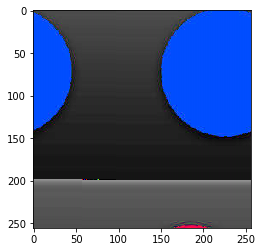

In [22]:
plt.imshow(np.flipud(gravar[122:].reshape(256, 256, 3)))

In [11]:
rcv = rcv[122:]

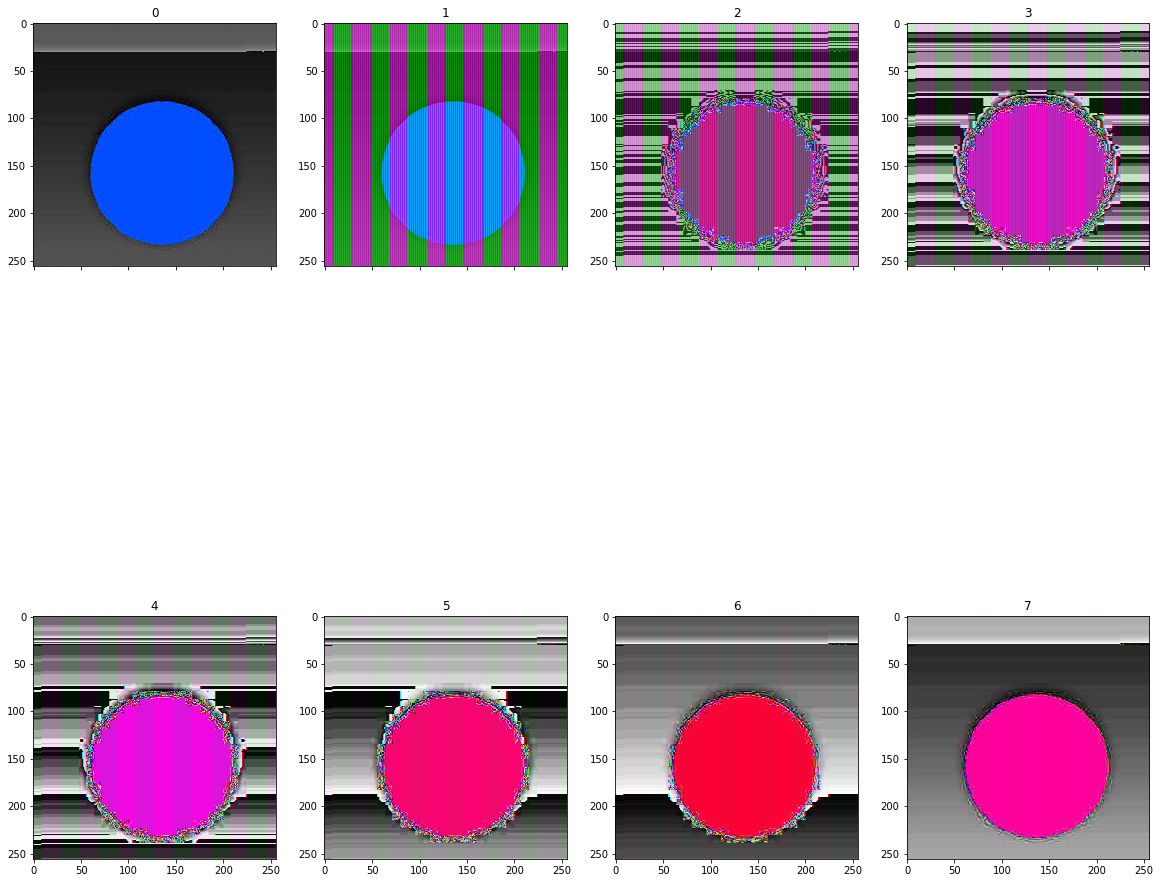

In [17]:
fig, ax = plt.subplots(2, 4, sharex=True, figsize=(20, 20))

#0, 1, 2
roll_cor = 0

for i in range(8):
    rcv_t = np.roll(np.packbits(np.roll(np.unpackbits(rcv), i)), roll_cor)
    ax[i//4, i%4].set_title(i)
    ax[i//4, i%4].imshow(rcv_t.reshape(256, 256, 3))

In [13]:
findBitShift_and_Begin(rcv)

(0, 177138)

In [ ]:
##################

In [59]:
bit_error = 196730 * 8 - np.sum(np.equal(np.unpackbits(array), np.unpackbits(orig)))

In [60]:
bit_error*100/(196730 * 8)

0.0024144766939460174

In [47]:
np.equal(np.unpackbits(array), np.unpackbits(orig))

array([ True,  True,  True, ...,  True,  True,  True])

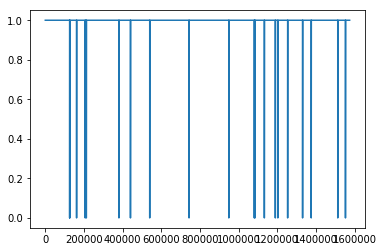

In [48]:
plt.plot(np.equal(np.unpackbits(array), np.unpackbits(orig)))